In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('wine_data.csv',header =None,usecols=[0,1,2])
df.columns = ["Label","Alcohol","Malic_acid"]

In [3]:
df.head()

,Label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [4]:
df.describe()

,Label,Alcohol,Malic_acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

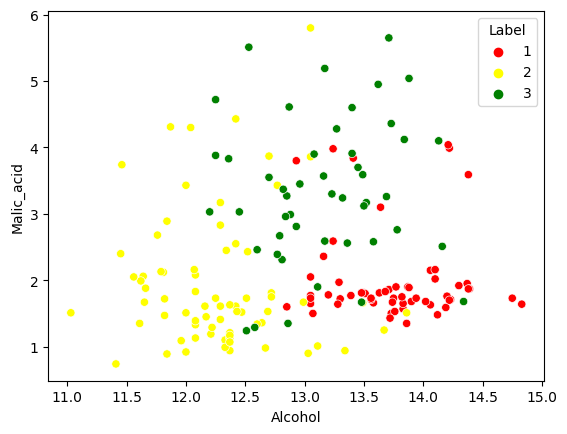

In [5]:
color = {1:'red',2:'yellow',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic_acid'],hue =df['Label'],palette = color)

In [6]:
df.shape

(178, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(df.drop('Label',axis =1),df['Label'],test_size=0.3,random_state=0)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((124, 2), (54, 2), (124,), (54,))

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler =MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [13]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [14]:
np.round(X_train.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


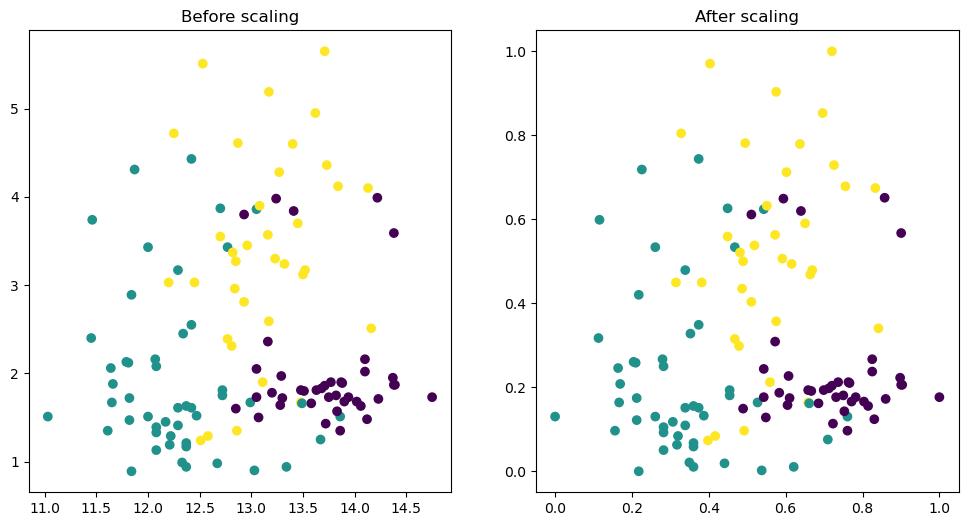

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols =2,figsize = (12,6))
ax1.scatter(X_train["Alcohol"],X_train["Malic_acid"],c = y_train)
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled["Alcohol"],X_train_scaled["Malic_acid"],c = y_train)
ax2.set_title("After scaling")
plt.show()


Text(0.5, 1.0, 'After scaling')

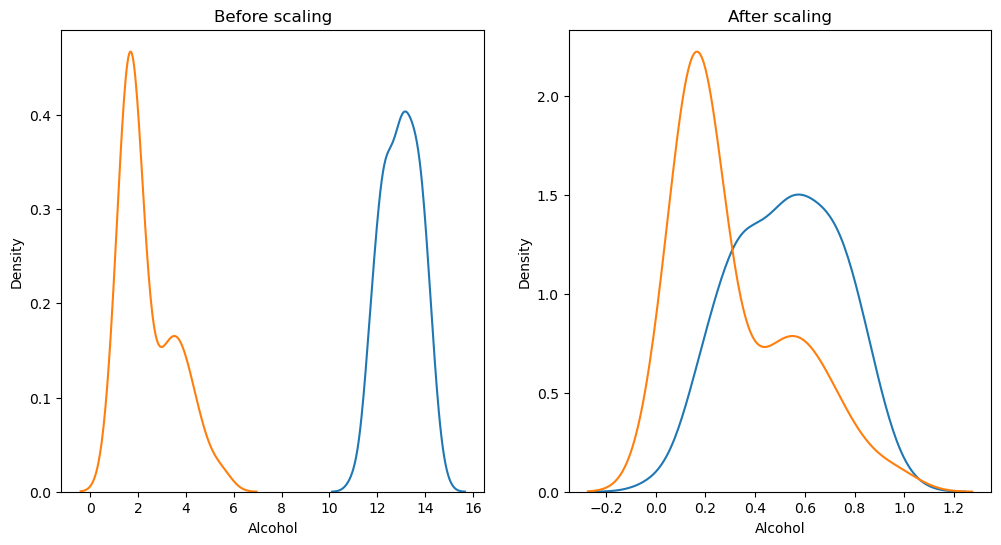

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols =2,figsize = (12,6))
sns.kdeplot(X_train['Alcohol'],ax = ax1)
sns.kdeplot(X_train['Malic_acid'],ax = ax1)
ax1.set_title("Before scaling")

sns.kdeplot(X_train_scaled['Alcohol'],ax = ax2)
sns.kdeplot(X_train_scaled['Malic_acid'],ax = ax2)
ax2.set_title("After scaling")



In [17]:
data = pd.read_csv('Social_Network_Ads.csv')

In [18]:
data  =data.iloc[:,2:]

In [19]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Purchased',axis = 1),data['Purchased'],test_size=0.3,random_state=0)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [25]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [26]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


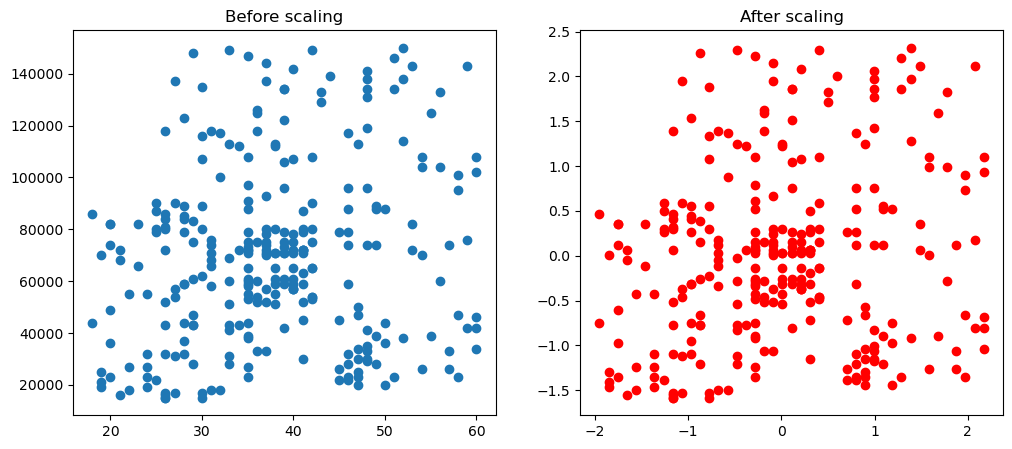

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols =2,figsize = (12,5))

ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"],color='Red')
ax2.set_title("After scaling")
plt.show()
